In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv('../data/job_result.csv')

In [3]:
df['location'] = df['location'].apply(ast.literal_eval)

df_expanded = df.explode('location')

location_counts = df_expanded.groupby(['programming language', 'location']).size().unstack(fill_value=0)

location_counts['total'] = location_counts.sum(axis=1)
sorted_location_counts = location_counts.sort_values('total', ascending=False)

In [4]:
def plot_location_counts(part, title):
    plt.figure(figsize=(15, 8))  
    
    colors = sns.color_palette("tab20", n_colors=part.shape[1] - 1) 
    part.drop('total', axis=1).plot(kind='bar', stacked=True, width=0.8, ax=plt.gca(), color=colors)
    
    plt.xlabel('Programming Language')
    plt.ylabel('Count of Locations') 
    plt.title(title) 
    plt.legend(title='Locations', bbox_to_anchor=(1.05, 1), loc='upper left')  
    plt.tight_layout()
    plt.show()

In [5]:
split_size = len(sorted_location_counts) // 5
first_part = sorted_location_counts.iloc[:split_size]
second_part = sorted_location_counts.iloc[split_size:2*split_size]
third_part = sorted_location_counts.iloc[2*split_size:3*split_size]
fourth_part = sorted_location_counts.iloc[3*split_size:4*split_size]
fifth_part = sorted_location_counts.iloc[4*split_size:]


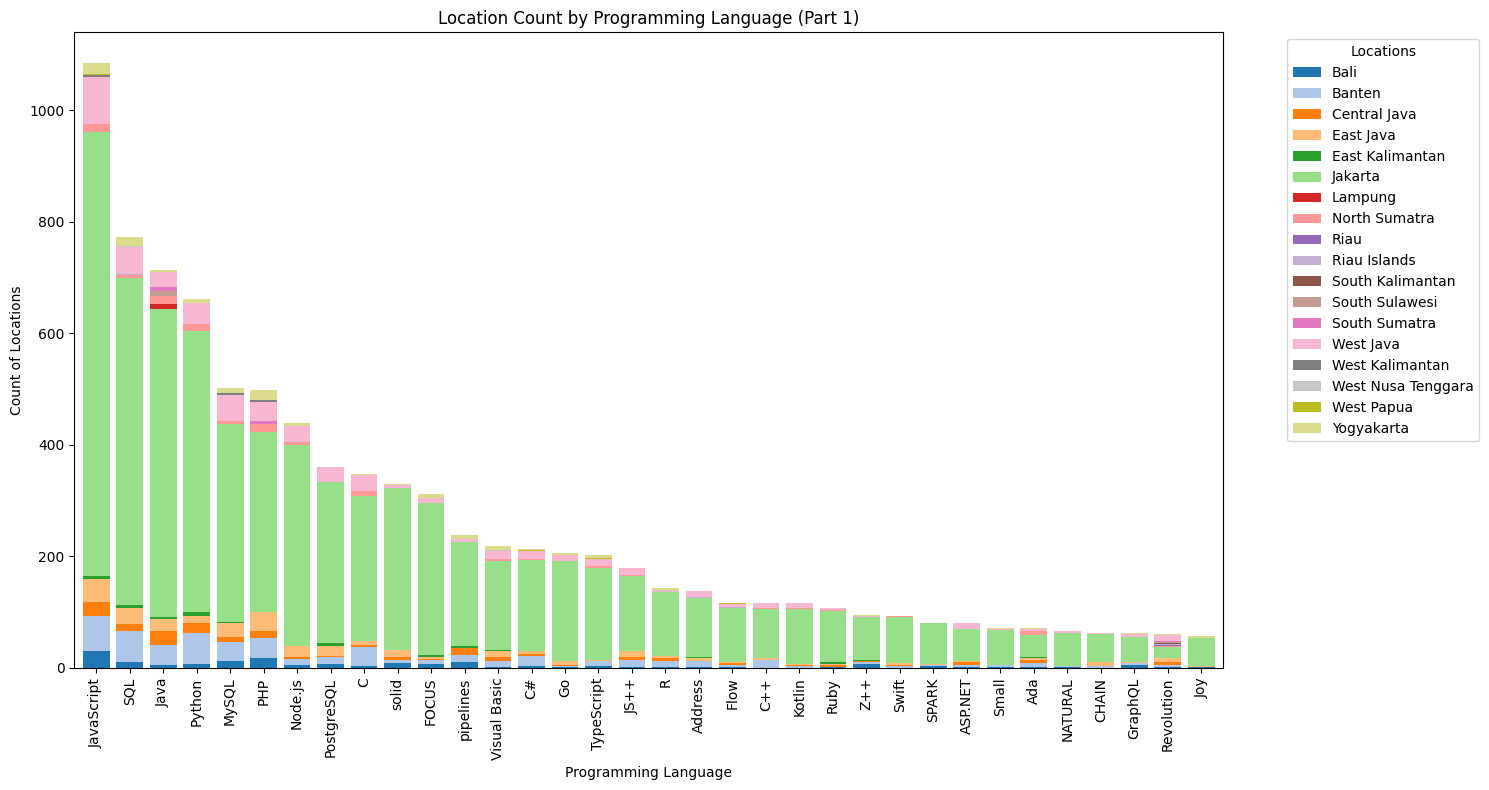

In [6]:
plot_location_counts(first_part, 'Location Count by Programming Language (Part 1)')

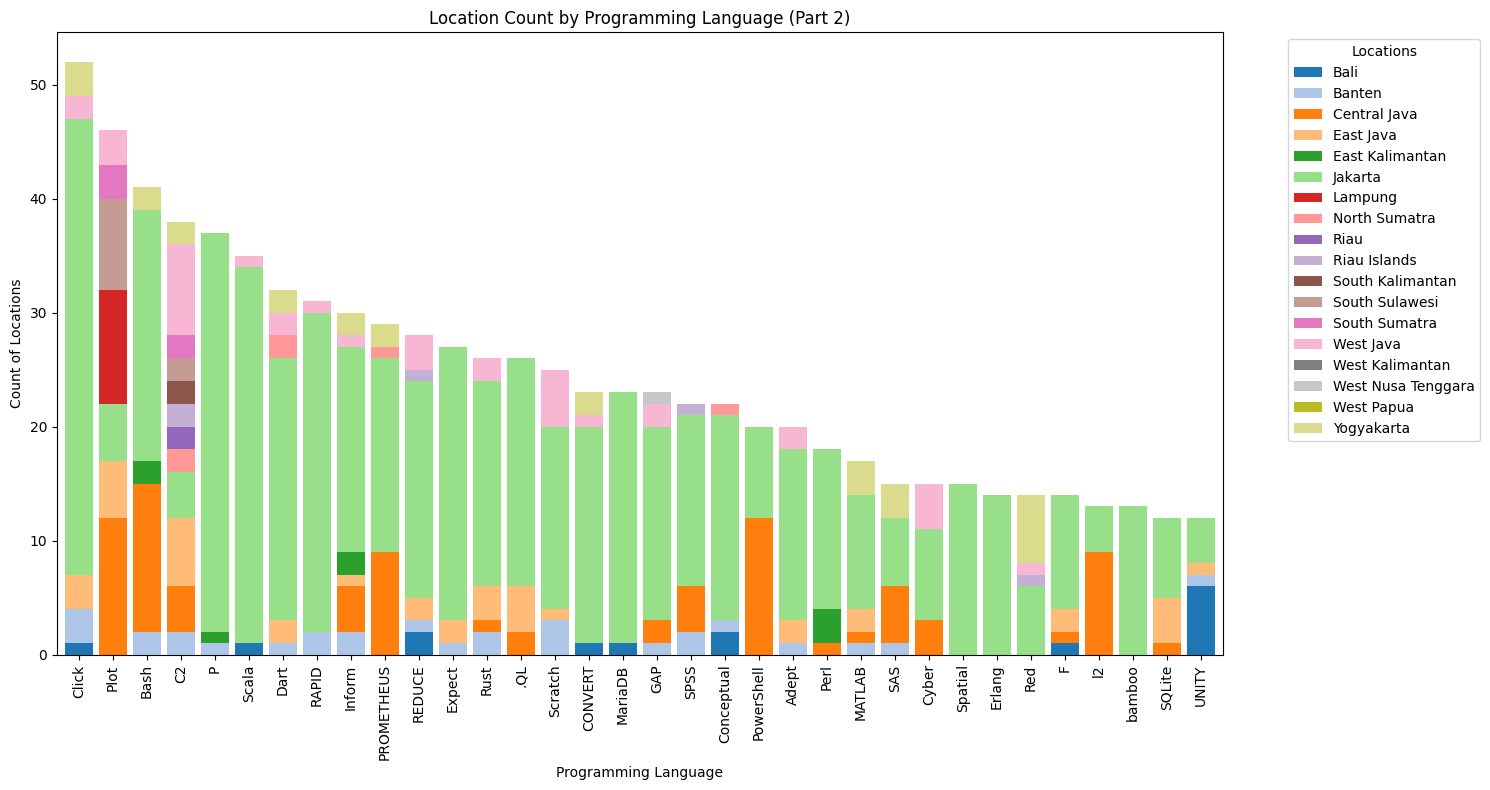

In [7]:
plot_location_counts(second_part, 'Location Count by Programming Language (Part 2)')

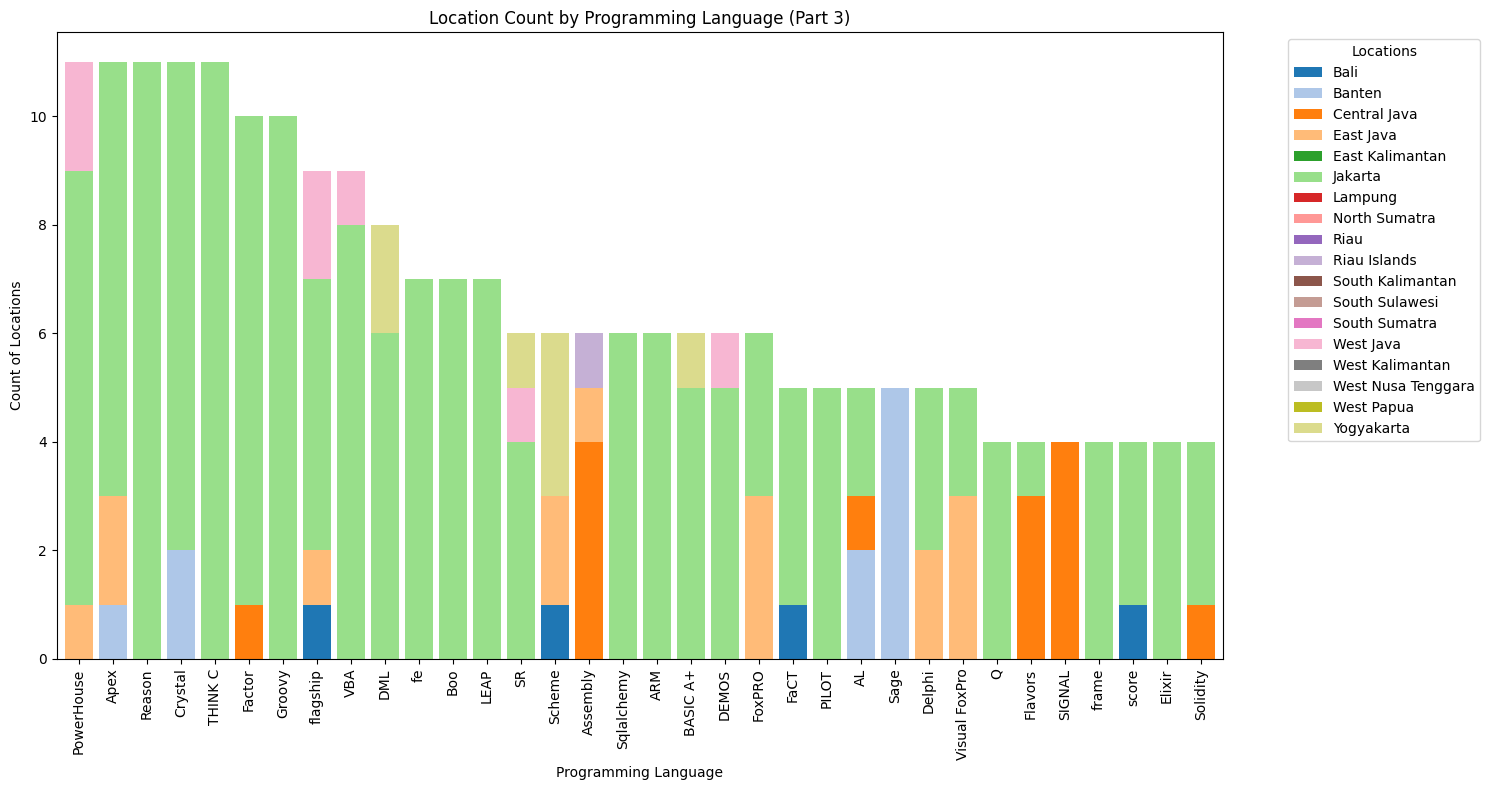

In [8]:
plot_location_counts(third_part, 'Location Count by Programming Language (Part 3)')

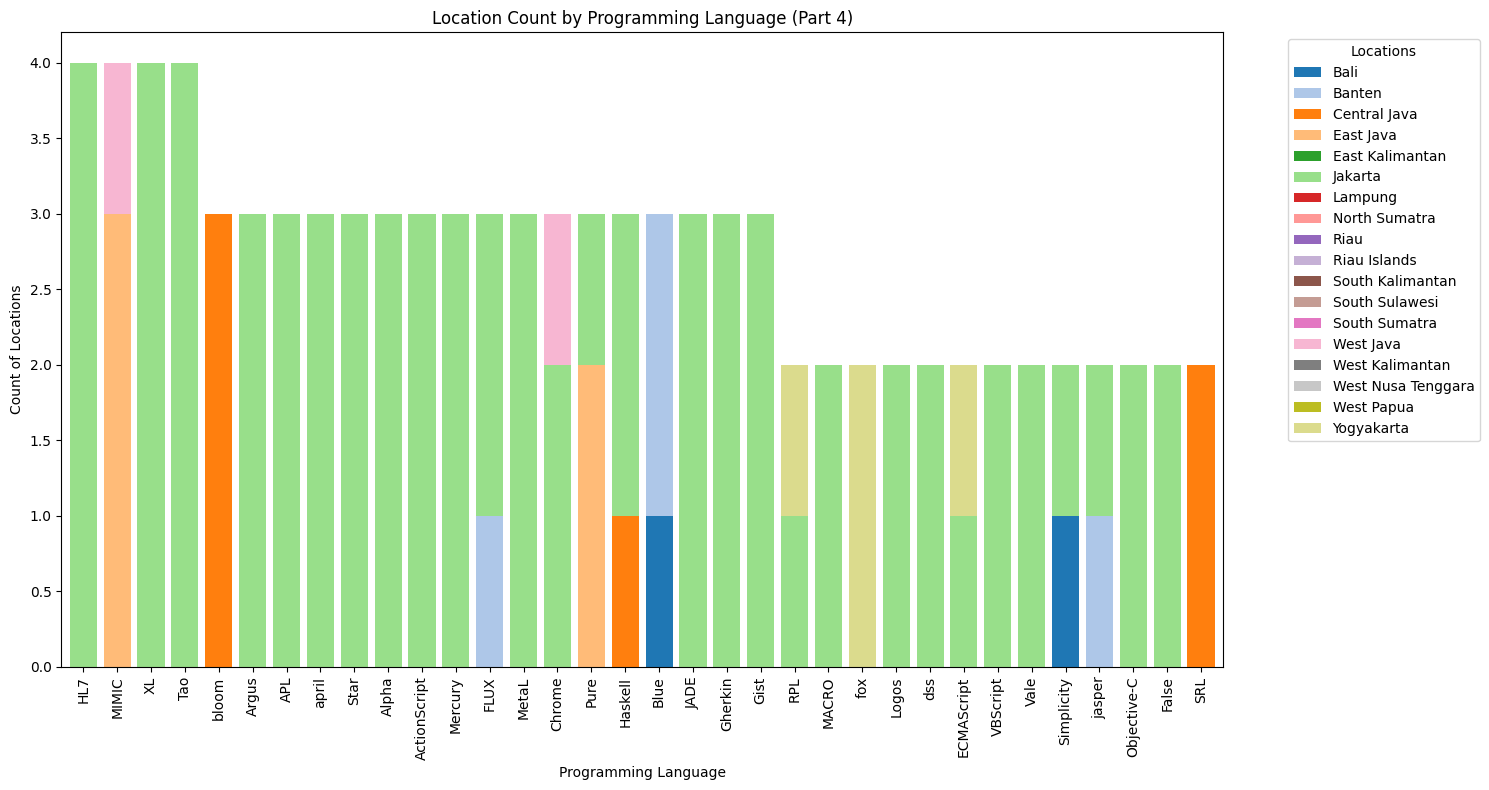

In [9]:
plot_location_counts(fourth_part, 'Location Count by Programming Language (Part 4)')

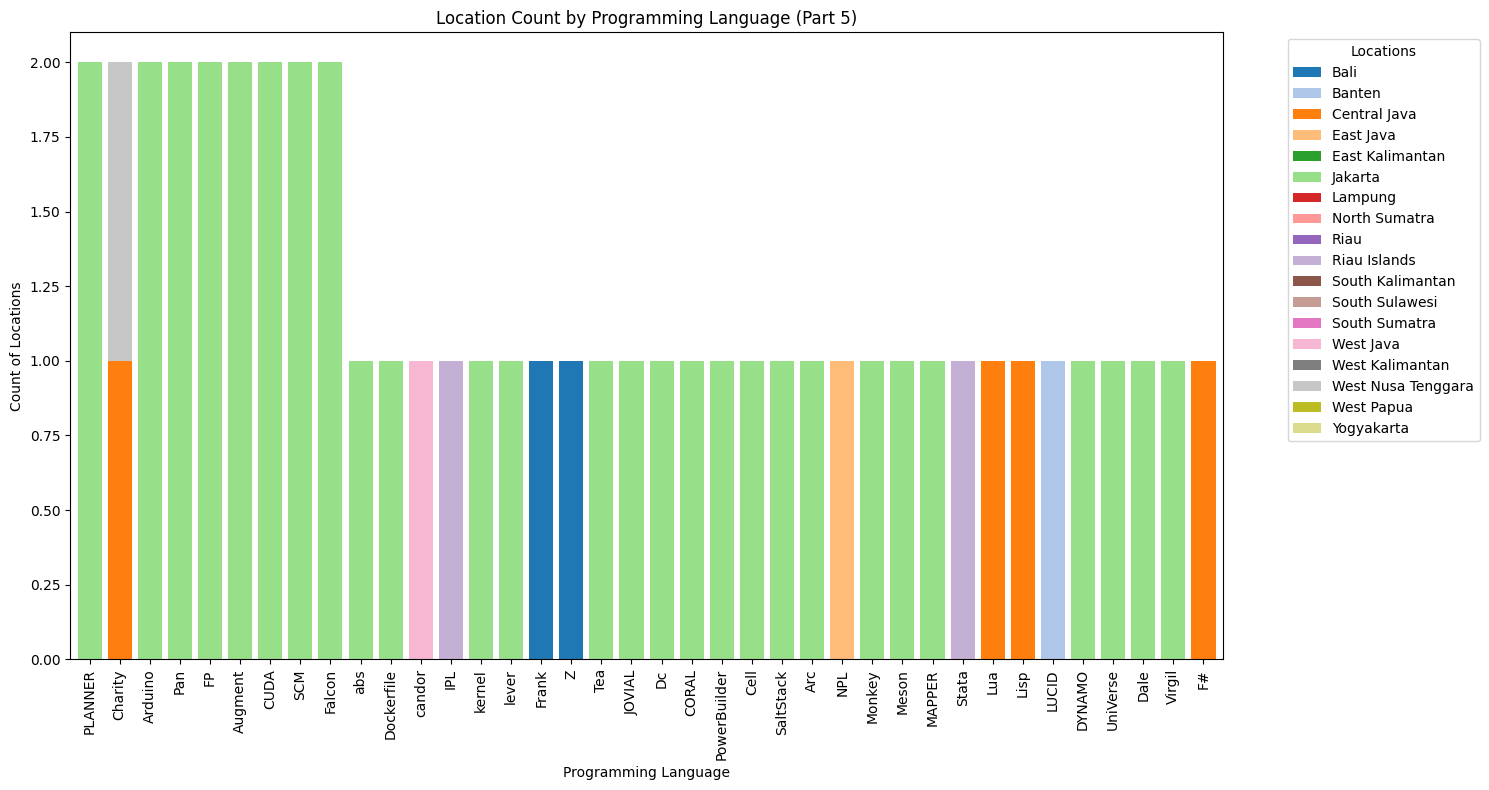

In [10]:
plot_location_counts(fifth_part, 'Location Count by Programming Language (Part 5)')